In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


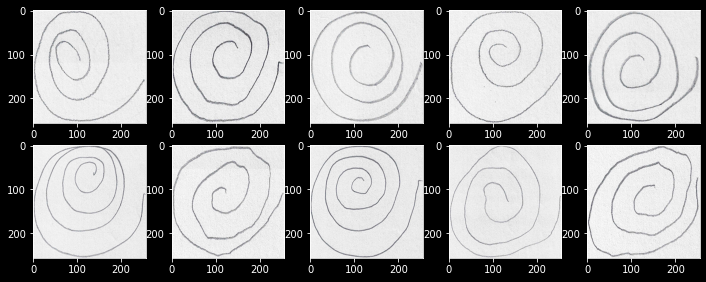

In [ ]:
plt.figure(figsize= (12,12))
for i in range(1, 11, 1):
    plt.subplot(5,5,i)
    img = load_img("/content/drive/MyDrive/Parkinsons-Drawings/Spiral/training/healthy/"+
    os.listdir("/content/drive/MyDrive/Parkinsons-Drawings/Spiral/training/healthy")[i])
    plt.imshow(img)
plt.show()

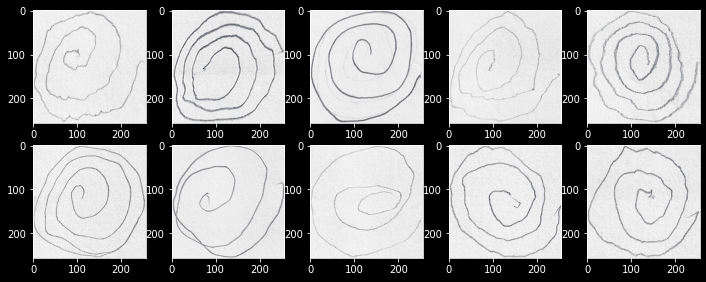

In [ ]:
plt.figure(figsize= (12,12))
for i in range(1, 11, 1):
    plt.subplot(5,5,i)
    img = load_img("/content/drive/MyDrive/Parkinsons-Drawings/Spiral/training/parkinson/"+
                  os.listdir("/content/drive/MyDrive/Parkinsons-Drawings/Spiral/training/parkinson")[i])
    plt.imshow(img)
plt.show()

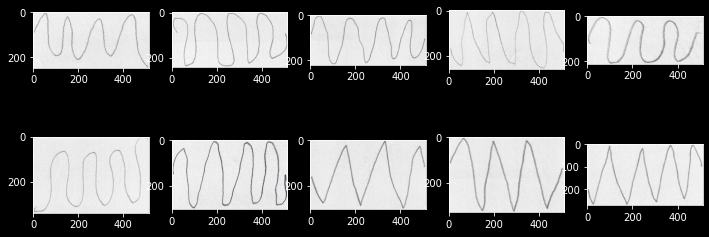

In [ ]:
plt.figure(figsize= (12,12))
for i in range(1, 11, 1):
    plt.subplot(5,5,i)
    img = load_img("/content/drive/MyDrive/Parkinsons-Drawings/wave/training/healthy/"+
                  os.listdir("/content/drive/MyDrive/Parkinsons-Drawings/wave/training/healthy")[i])
    plt.imshow(img)
plt.show()

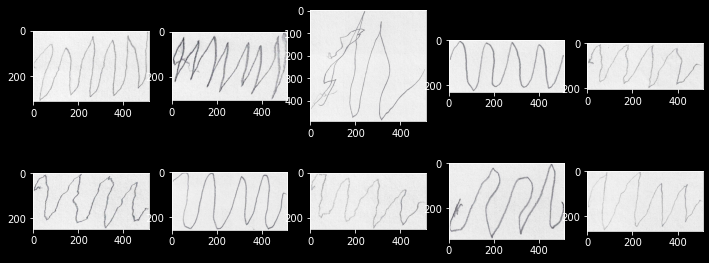

In [ ]:
plt.figure(figsize= (12,12))
for i in range(1, 11, 1):
    plt.subplot(5,5,i)
    img = load_img("/content/drive/MyDrive/Parkinsons-Drawings/wave/training/parkinson/"+
                  os.listdir("/content/drive/MyDrive/Parkinsons-Drawings/wave/training/parkinson")[i])
    plt.imshow(img)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(activation='relu',units=128))
classifier.add(Dense(activation='sigmoid',units=1))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
spiral_train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Parkinsons-Drawings/Spiral/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

spiral_test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Parkinsons-Drawings/Spiral/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
wave_train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Parkinsons-Drawings/wave/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

wave_test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Parkinsons-Drawings/wave/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

epochs = 48

classifier.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = classifier.fit(
        spiral_train_generator,
        steps_per_epoch=spiral_train_generator.n//spiral_train_generator.batch_size,
        epochs=48,
        validation_data=spiral_test_generator,
        validation_steps=spiral_test_generator.n//spiral_test_generator.batch_size)

Epoch 1/48
2/2 [==============================] - 2s 577ms/step - loss: 0.6965 - accuracy: 0.4500
Epoch 2/48
2/2 [==============================] - 1s 1s/step - loss: 0.6956 - accuracy: 0.5750
Epoch 3/48
2/2 [==============================] - 1s 294ms/step - loss: 0.6881 - accuracy: 0.5500
Epoch 4/48
2/2 [==============================] - 2s 904ms/step - loss: 0.7083 - accuracy: 0.4844
Epoch 5/48
2/2 [==============================] - 1s 409ms/step - loss: 0.7015 - accuracy: 0.4750
Epoch 6/48
2/2 [==============================] - 2s 1s/step - loss: 0.6924 - accuracy: 0.5750
Epoch 7/48
2/2 [==============================] - 2s 687ms/step - loss: 0.6931 - accuracy: 0.4688
Epoch 8/48
2/2 [==============================] - 2s 2s/step - loss: 0.6929 - accuracy: 0.5750
Epoch 9/48
2/2 [==============================] - 2s 1s/step - loss: 0.6932 - accuracy: 0.4750
Epoch 10/48
2/2 [==============================] - 1s 303ms/step - loss: 0.6931 - accuracy: 0.4750
Epoch 11/48
2/2 [==============

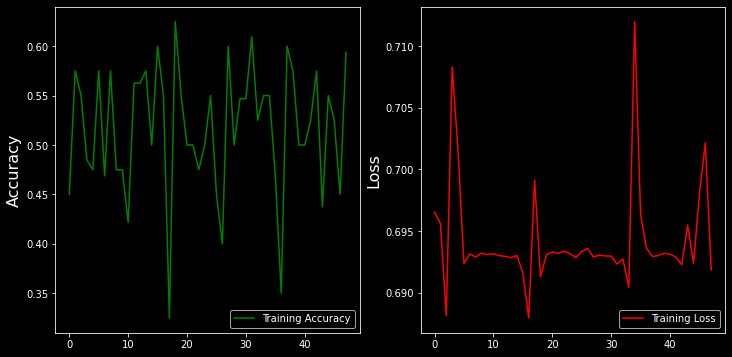

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()

In [ ]:
classifier.evaluate(wave_test_generator)


1/1 [==============================] - 1s 565ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6930730938911438, 0.5]

In [ ]:
classifier.evaluate(spiral_test_generator)

1/1 [==============================] - 0s 366ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933153867721558, 0.5]

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              